# Custom Dataset with RNN

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_data(seq_length=50, num_samples=1000):
  X = np.linspace(0,100,num_samples)
  y = np.sin(X)
  sequence = []
  targets = []

  for i in range(len(X)-seq_length):
    sequence.append(y[i:i+seq_length])
    targets.append(y[i+seq_length]) #after input sequence this value comes

  plt.figure(figsize=(8,4))
  plt.plot(X,y,label='sin(t)', color='b', linewidth=2)
  plt.title('Sinus Graphic')
  plt.xlabel('Time')
  plt.ylabel('Genlik')
  plt.legend()
  plt.grid(True)
  plt.show()

  return np.array(sequence), np.array(targets)

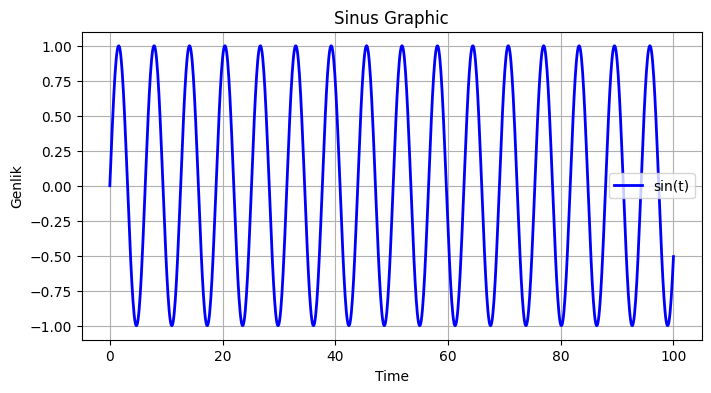

In [3]:
sequence, targets = generate_data()

In [9]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers=1):
    #RNN returns a linear output
    super(RNN, self).__init__()
    self.rnn = nn.RNN(input_size, hidden_size,num_layers, batch_first=True)
    #hidden size=rnn hidden cell number
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    out, _ = self.rnn(x)
    out = self.fc(out[:,-1,:]) #latest time output
    return out

model = RNN(1,16,1,1)

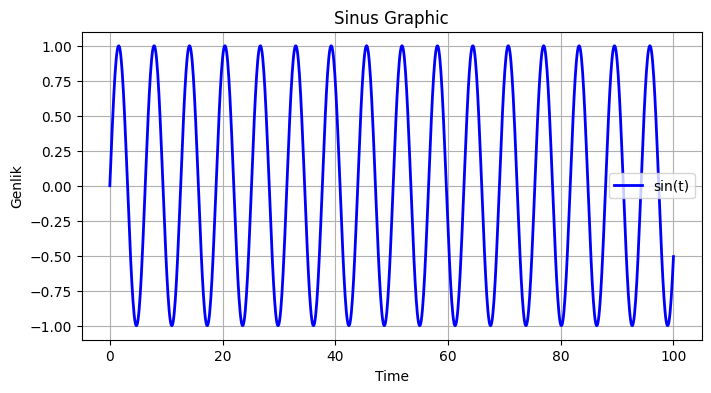

In [10]:
seq_length = 50 #size of input
input_size = 1 #size of input
hidden_size = 16 #rnn hidden layer node number
output_size = 1 #output size or predicted value
num_layers=1
epochs = 20
batch_size = 32
learning_rate = 0.001

X, y = generate_data(seq_length)
X = torch.tensor(X, dtype = torch.float32).unsqueeze(-1) #add a new dimension with unsqueeze
y = torch.tensor(y, dtype = torch.float32).unsqueeze(-1) #turn to pytorch tensor

dataset = torch.utils.data.TensorDataset(X,y) #pytorch dataset creation
dataLoader = DataLoader(dataset, batch_size = batch_size, shuffle=True)

In [11]:
model = RNN(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss() #this is not a classification problem
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
for epoch in range(epochs):
  for batch_x, batch_y in dataLoader:
    optimizer.zero_grad() #make the gradients zero
    pred_y = model(batch_x) #take pred from model
    loss = criterion(pred_y, batch_y) #compare true and pred
    loss.backward()
    optimizer.step()
  print(f"Epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch: 1/20, Loss: 0.1947
Epoch: 2/20, Loss: 0.0372
Epoch: 3/20, Loss: 0.0274
Epoch: 4/20, Loss: 0.0210
Epoch: 5/20, Loss: 0.0097
Epoch: 6/20, Loss: 0.0057
Epoch: 7/20, Loss: 0.0025
Epoch: 8/20, Loss: 0.0020
Epoch: 9/20, Loss: 0.0011
Epoch: 10/20, Loss: 0.0012
Epoch: 11/20, Loss: 0.0011
Epoch: 12/20, Loss: 0.0011
Epoch: 13/20, Loss: 0.0008
Epoch: 14/20, Loss: 0.0007
Epoch: 15/20, Loss: 0.0008
Epoch: 16/20, Loss: 0.0006
Epoch: 17/20, Loss: 0.0007
Epoch: 18/20, Loss: 0.0004
Epoch: 19/20, Loss: 0.0003
Epoch: 20/20, Loss: 0.0003


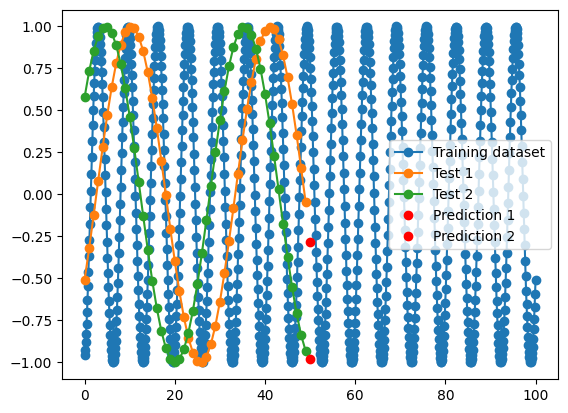

In [15]:
#create dataset for test
X_test = np.linspace(100,110,seq_length).reshape(1,-1)
y_test = np.sin(X_test)

X_test2 = np.linspace(120,130, seq_length).reshape(1,-1)
y_test2 = np.sin(X_test2)

X_test = torch.tensor(y_test, dtype = torch.float32).unsqueeze(-1)
X_test2 = torch.tensor(y_test2, dtype = torch.float32).unsqueeze(-1)

model.eval()
prediction1 = model(X_test).detach().numpy()
prediction2 = model(X_test2).detach().numpy()

plt.figure()
plt.plot(np.linspace(0,100,len(y)), y, marker='o', label="Training dataset")
plt.plot(X_test.numpy().flatten(), marker='o', label="Test 1")
plt.plot(X_test2.numpy().flatten(), marker='o', label="Test 2")

plt.plot(np.arange(seq_length, seq_length+1), prediction1.flatten(), "ro", label="Prediction 1")
plt.plot(np.arange(seq_length, seq_length+1), prediction2.flatten(), "ro", label="Prediction 2")
plt.legend()
plt.show()